# Pandas Time Series

Today we are going to look at CO$_2$ data and try to learn about time series.  I will  introduce it and then you will be in charge of analyzing CO$_2$ data from Mauna Lao.  We are going to start by looking at the data from the Scripps Pier.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

First go get CO2 data for Scripps.  http://scrippsco2.ucsd.edu/data/atmospheric_co2/ljo and the La Jolla Pier.  
-  I did flask  daily values.  
-  Download and Open the CSV.  
-  rename the columns and called them Date, HR, Excel, Year, Flask, Flag, CO2.  
-  Then we can skip the rows and columns we don't want.  

I kept all the information in place and used skiprows to skip what we don't want.  
 http://pandas.pydata.org/pandas-docs/stable/  T

Start by just reading in the data.  do you get the data?  Then get more clever as you go.  Here is the read_csv information. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html or http://pandas.pydata.org/pandas-docs/stable/io.html

You just need to try and do to learn.  


In [5]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68)

## Flashback. Remember I am just printing head() to save space on the printouts

In [6]:
print (df_scripps.head())

         Date      Hr     Excel      Year  Flasks  Flags     CO2
0  10/23/1968   11:10  25134.47  1968.810       0      4  369.38
1  10/31/1968   14:44  25142.61  1968.832       0      4  332.92
2   1/13/1969   15:00  25216.62  1969.035       2      0  333.00
3   1/17/1969   15:24  25220.64  1969.046       3      0  331.50
4   1/20/1969   15:42  25223.65  1969.054       0      4  326.87


But we only want to the Date, Hr, Flags, and CO2.  So just grab those columns using use_cols

I just learned a neat trick and the reason why my printouts might look different then yours sometimes.  Sometimes when I print it actually just shows df.info()  which can be useful. so I am going to use this call to get us smaller descriptive outputs.

In [7]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6])
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 4 columns):
Date     1244 non-null object
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.0+ KB
None


This does the same thing but using column names.  

In [8]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=['Date','Hr','Flags','CO2'])
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 4 columns):
Date     1244 non-null object
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.0+ KB
None


Now lets turn the Date into a datetime index.  It is critical to get a datetime index. I can't stress that enough. So you can make sure it 

# Remember you need a date time index!

# Remember what I said.  The date time index is critical and can really mess you up if you don't have it!

# Don't forget this!!!

First we are making Date the index column

In [9]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6],index_col='Date')
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 10/23/1968 to 12/17/2014
Data columns (total 3 columns):
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.9+ KB
None


We now have the Dates as an index but we don't have a datetime index. We need that!  parse_dates tells it it is a date

# CRITICAL!

In [11]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6]\
                       ,index_col='Date',parse_dates=True)
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 1968-10-23 to 2014-12-17
Data columns (total 3 columns):
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.9+ KB
None


# Now we have a datetime index! See how it says Datetimeindex

Now we have that.  We could have also.

I am now showing you some different tricks to do the same thing.  These might come in handy later

In [12]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6],\
                    parse_dates=True,index_col='Date')
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 1968-10-23 to 2014-12-17
Data columns (total 3 columns):
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.9+ KB
None


But you can also just read in and deal with it later.  First we can set the Date to a Datetime.  Then set that to an index.  

In [13]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6])
df_scripps.Date=pd.to_datetime(scripps.Date)
df_scripps.set_index('Date',inplace=True)
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 1968-10-23 to 2014-12-17
Data columns (total 3 columns):
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.9+ KB
None


We could also do it all at once.  

In [14]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6])
df_scripps=df_scripps.set_index(pd.to_datetime(df_scripps.Date))
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 1968-10-23 to 2014-12-17
Data columns (total 4 columns):
Date     1244 non-null object
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.6+ KB
None


But back to reading in. We can also add the hours to the date and set the index and dateime all at once.  BUT YOU NEED the double brackets on parse dates for this to work because it is a list you are using

In [15]:
df_scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6],parse_dates=[['Date','Hr']]
                    ,index_col='Date_Hr')
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 1968-10-23 11:10:00 to 2014-12-17 17:25:00
Data columns (total 2 columns):
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1)
memory usage: 29.2 KB
None


This is a fun trick.  We can use python to grab the csv file for us off of the website!  No need to download.  But something is wrong with the file and we will lose the first row of data.  I needed to change to 69 skip rows and then you can see the problem with the names.  

In [24]:
url='http://scrippsco2.ucsd.edu/sites/default/files/data/flask_co2_and_isotopic/daily_co2/fldav_ljo.csv'
df_scripps=pd.read_csv(url,skiprows=69,usecols=[0,1,5,6])
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 4 columns):
1968-10-23    1311 non-null object
 11:10        1311 non-null object
  4           1311 non-null int64
 369.38       1311 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB
None


Definately funny  

In [26]:
url='http://scrippsco2.ucsd.edu/sites/default/files/data/flask_co2_and_isotopic/daily_co2/fldav_ljo.csv'
df_scripps=pd.read_csv(url,skiprows=69,usecols=[0,1,5,6],parse_dates=[[0,1]],index_col=[0])
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1311 entries, 1968-10-31 14:44:00 to 2018-05-03 14:49:00
Data columns (total 2 columns):
  4        1311 non-null int64
 369.38    1311 non-null float64
dtypes: float64(1), int64(1)
memory usage: 30.7 KB
None


Now we can rename our columns and lose our first datapoint

In [28]:
url='http://scrippsco2.ucsd.edu/sites/default/files/data/flask_co2_and_isotopic/daily_co2/fldav_ljo.csv'
df_scripps=pd.read_csv(url,skiprows=69,usecols=[0,1,5,6],parse_dates=[[0,1]],index_col=[0])
df_scripps.columns=['Flags','CO2']
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1311 entries, 1968-10-31 14:44:00 to 2018-05-03 14:49:00
Data columns (total 2 columns):
Flags    1311 non-null int64
CO2      1311 non-null float64
dtypes: float64(1), int64(1)
memory usage: 30.7 KB
None


You are now an expert at getting data in.  You can figure it out!  Lets plot the date.

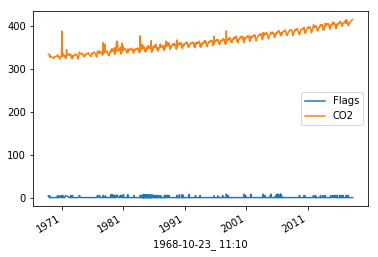

In [29]:
df_scripps.plot()

Lets just plot the CO2 data

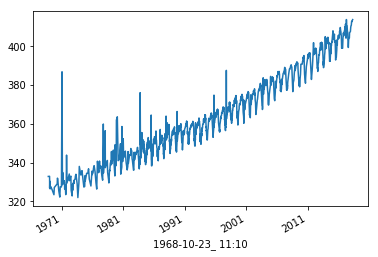

In [30]:
df_scripps.CO2.plot()

There is obviosly some bad data points.  Go look at the csv file header and figure out which values are good and only keep the good data.  Good data has a flag of 0.  I am going to drop all the other data

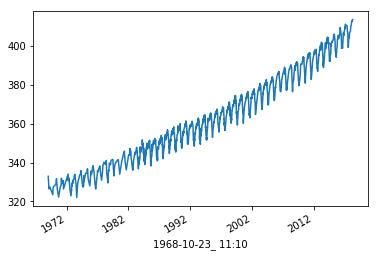

In [32]:
df_scripps=df_scripps[df_scripps.Flags==0]
df_scripps.CO2.plot()

Now that is much nicer!  

Now can you plot just the data from your birth year?

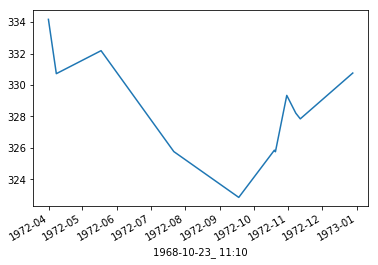

In [33]:
df_scripps['1972'].CO2.plot()

Remember all your slicing?  We can also now slice by Date!!!

Now just plot it for the years you were in high school

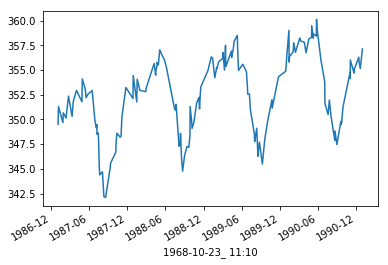

In [34]:
df_scripps['1987':'1990'].CO2.plot()

Now I am going to go complicated on you.  This is the first time I am trying it and I am not sure it will work.  Can we make a boxplot of CO2 for each year? I will make a new column that is the year and the I will make a boxplot by year.  Here is the documentation http://pandas-docs.github.io/pandas-docs-travis/visualization.html.  This is an important note.  To make a new column you have to use the [] notation and not the . notation.  See this example.


In [35]:
df_scripps['Year']=df_scripps.index.year
print (df_scripps.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1162 entries, 1969-01-13 15:00:00 to 2018-05-03 14:49:00
Data columns (total 3 columns):
Flags    1162 non-null int64
CO2      1162 non-null float64
Year     1162 non-null int64
dtypes: float64(1), int64(2)
memory usage: 76.3 KB
None


You can also make new columns by using math.  What if you wanted to make a new dataframe that was the CO2 times 10 minus 5?  I would just make a new column first.  If you need a new dataframe you could do that also.

In [36]:
# to make a new column
df_scripps['CO2_10x']=df_scripps.CO2*10.0-5.0
print (df_scripps.head())

#to make a new dataframe
df=pd.DataFrame()
df['CO2_10x']=df_scripps.CO2*10.0-5.0
print (df.head())

                     Flags     CO2  Year  CO2_10x
1968-10-23_ 11:10                                
1969-01-13 15:00:00      0  333.00  1969   3325.0
1969-01-17 15:24:00      0  331.50  1969   3310.0
1969-01-29 15:47:00      0  330.50  1969   3300.0
1969-02-18 16:28:00      0  326.50  1969   3260.0
1969-02-21 14:12:00      0  326.58  1969   3260.8
                     CO2_10x
1968-10-23_ 11:10           
1969-01-13 15:00:00   3325.0
1969-01-17 15:24:00   3310.0
1969-01-29 15:47:00   3300.0
1969-02-18 16:28:00   3260.0
1969-02-21 14:12:00   3260.8


### Flashback to earlier Pandas handouts
Now remember back to boxplots...... Can you make a boxplot of CO2 "by" year?  

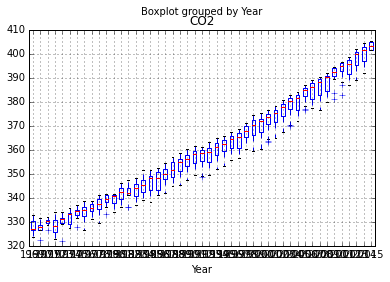

Making really pretty boxplots in Pandas isn't always perfect.  Here are a few hints to use our fig and ax nomenclature.  Fixing the ticks is harder.  You have to add a new label for each tick and then blanks for the ones you don't want.  just some tricks to put in your back pocket.  Don't spend much time here.  Just file it away for future reference,

Text(0.5,0.98,'')

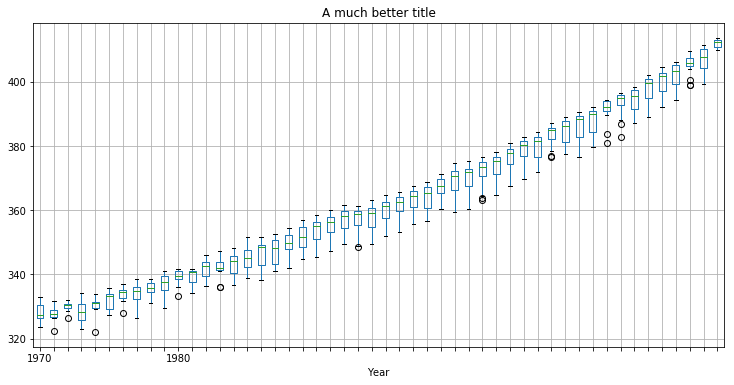

In [39]:
ax=df_scripps.boxplot(column='CO2',by='Year')
fig=ax.figure
fig.set_size_inches(12,6)
ax.set_title('A much better title')
ax.set_xticklabels(['1970','','','','','','','','','','1980'])
fig.suptitle('')#This has to go last.  

the next thing you might need to do is to resample by a larger time frame like a year. so what is the yearly mean?  By resample we mean take all the data and find a subset of it.  I am now just looking at the annual mean and plotting it all in one fell swoop.  You need the np.mean b/c we are using an numpy function on our data. 


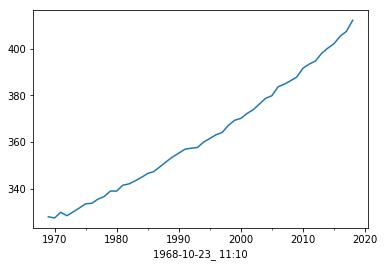

In [40]:
df_scripps.CO2.resample('A').mean().plot()

Now here is how we do our fig,ax to make it look nice within pandas.

Text(0.5,1,'Mean Annual CO$_2$ Concentraions at the La Jolla Pier')

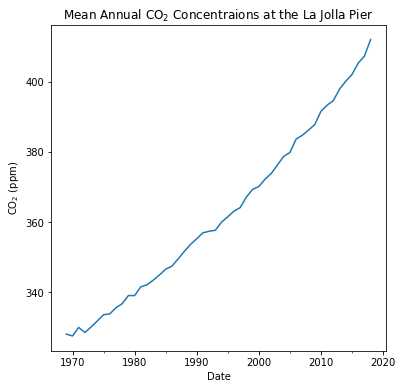

In [42]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
df_scripps.CO2.resample('A').mean().plot(ax=ax)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at the La Jolla Pier')

### Here is how you would plot the data in scatter

Text(0.5,1,'Mean Annual CO$_2$ Concentraions at the La Jolla Pier')

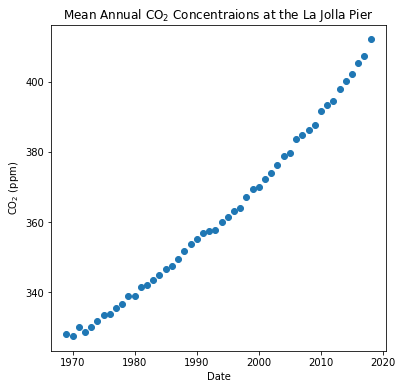

In [43]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
x=df_scripps.CO2.resample('A').mean().index.year
y=df_scripps.CO2.resample('A').mean()
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at the La Jolla Pier')

We could also plot all the data with plot to make nice labels.  

Text(0.5,1,'Mean Annual CO$_2$ Concentraions at the La Jolla Pier')

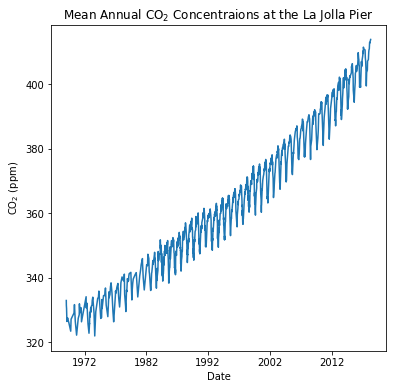

In [44]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
x=df_scripps.CO2.index
y=df_scripps.CO2
ax.plot(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at the La Jolla Pier')

Now back to using Pandas.

Offset Aliases

A number of string aliases are given to useful common time series frequencies. We will refer to these aliases as offset aliases (referred to as time rules prior to v0.8.0).

Alias	Description
B	business day frequency

C	custom business day frequency (experimental)

D	calendar day frequency

W	weekly frequency

M	month end frequency

BM	business month end frequency

CBM	custom business month end frequency

MS	month start frequency

BMS	business month start frequency

CBMS	custom business month start frequency

Q	quarter end frequency

BQ	business quarter endfrequency

QS	quarter start frequency

BQS	business quarter start frequency

A	year end frequency

BA	business year end frequency

AS	year start frequency

BAS	business year start frequency

H	hourly frequency

T	minutely frequency

S	secondly frequency

L	milliseonds

U	microseconds

N	nanoseconds


In [46]:
print( df_scripps.CO2.resample('Q').mean().head())  #THis just shows the quartely amounts!  
#If there is an NAN it won't let me plot straight away.  not sure why.  

1968-10-23_ 11:10
1969-03-31    329.616
1969-06-30    326.810
1969-09-30        NaN
1969-12-31    325.345
1970-03-31        NaN
Freq: Q-DEC, Name: CO2, dtype: float64


For the how part you can use any numpy array function. I have not found a list.  So you can try many.  

For now we will go back and use the annual mean values.  So use those functions for the next few graphs.

Now you should be able to set an x to year and a Y to average CO2 and see if there is a linear correlation.  What is the r2 and the p-value.  Make a nice graph.  Use annual mean values.

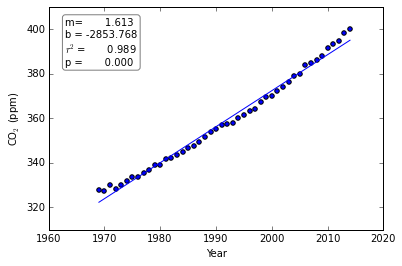

In [27]:
# Your code here!


the $r^2$ is great but the curve looks non-linear. By that I mean the error looks systematic and not random.  could we find the residuals and plot them?  So could we plot how far off the value is from the line for each year?  So the residual is the difference in y-space for each value for each year.  I added the zero line for reference byt using ax.axhline(y=0).  You can set a lot of properties with this.  I would make the residual by doing the math to look at the difference.

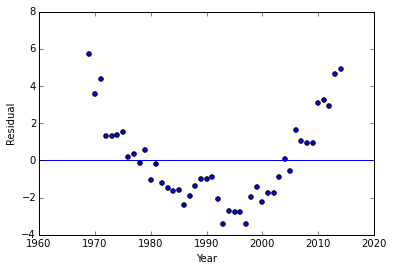

In [39]:
# Your code here!

So linear ain't working!  So lets go back to poly1d and see how a second order equation fits the data!  Do you remember using poly1d and all of its cool tricks????  

If you are going to use textstr to make a string with the results of poly1d to show the equation it takes a trick or two.  I did it two ways.  First you could cast something to a string.  So you could do

textstr='CO2='+str(poly1d(a))  

or you could do 

textstr='CO2={}'.format(poly1d(a))

If you want to subscript the 2 you can do the dollar sign trick for an equation with an underscore.  I can't close the dollar signs as it will show the eqauation
CO$_2$ so you would need to write CO\$_2\$  


But many people never got to poly1d in their packets. So here is a refresher.
Here is the description https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.poly1d.html

Remember for a polynominal
1st order  y=ax+b

2nd order y=ax$^2$+bx+c

3rd order y=ax$^3$+bx$^2$+cx+d

etc...

How it works.  Like linregress.  You pass your x,y and now the order to poly1d

set 
fit_order to 2 for a second order polynominal

Now use polyfit

a=np.polyfit(x,y,fit_order) 

Now it gets cool.

a is now a python class.  You can pass that to np.poly1d(a)

polynominal=np.poly1d(a)

It returns the equation.  I called it polynomial.  But that equation will also do math for you.  You give it an X and it gives you Y! So used linspace to make a bunch of x values!  You want more than 2 now becuase your line will be curved.

x_fit=np.linspace(x.min(),x.max())  

Now send your x_fit into polynominal and you have all your y's!

y_fit=polynominal(x_fit)

Now plot them!


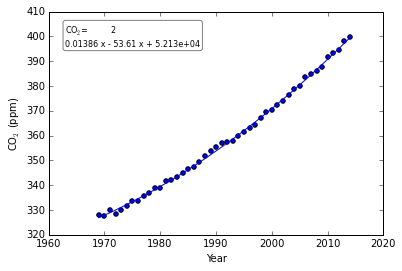

In [40]:
# Your code here!


Now that is a great fit!!!!!!  We can also look at the residuals for it.  Can you plot the residuals???

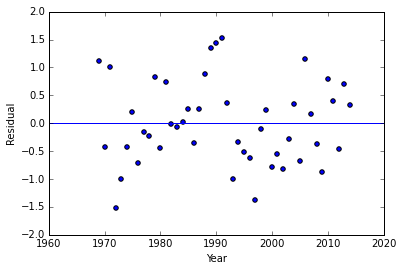

In [41]:
# Your code here!


Now make a prediction for CO2 for 2016-2050!  Can you extend the line to 2050?

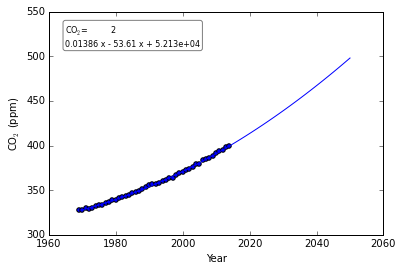

In [47]:
# Your code here



### Comments!!!

I have been really bad about adding comments to the code I write. I try to write in markdown but you also want to add comments so people can follow the code.  So lets take our last code and add comments to help us using the hastag!  you will thank yourself in a few months from now.  So comment your last code and I know you can do better than me!  

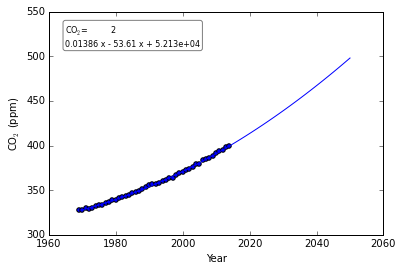

In [54]:
#your code and comments here!



### Answers

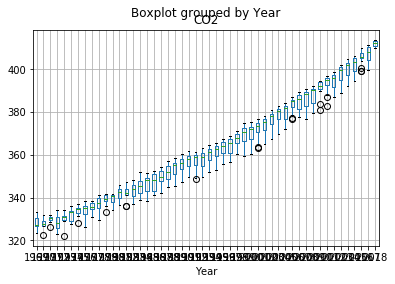

In [47]:
df_scripps.boxplot(column='CO2',by='Year')

Text(0.5,0,'Year')

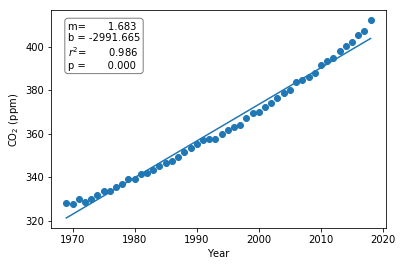

In [48]:
fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=df_scripps.CO2.resample('A').mean().index.year
y=df_scripps.CO2.resample('A').mean()
ax.scatter(x,y)

results=stats.linregress(x,y)
ax.plot(x,results[0]*x+results[1])
textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

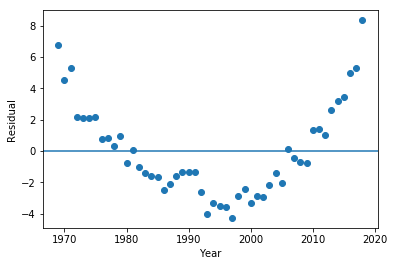

In [49]:
fig,ax=plt.subplots()

x=df_scripps.CO2.resample('A').mean().index.year
y=df_scripps.CO2.resample('A').mean()

results=stats.linregress(x,y)
ax.scatter(x,y-(results[0]*x+results[1]))
ax.set_ylabel('Residual')
ax.set_xlabel('Year')
ax.axhline(y=0)

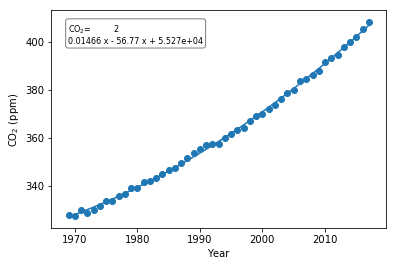

In [35]:
fit_order=2

fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=scripps.CO2.resample('A').mean().index.year
y=scripps.CO2.resample('A').mean()

x_fit=np.linspace(x.min(),x.max())  #I set the range using the data
a=np.polyfit(x,y,fit_order)  #I just copied from above to have in the same cell
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

textstr='CO$_2$={}'.format(polynominal)
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)

ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

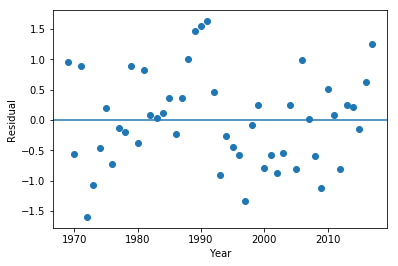

In [36]:

fit_order=2

fig,ax=plt.subplots()

x=scripps.CO2.resample('A').mean().index.year
y=scripps.CO2.resample('A').mean()

x_fit=np.linspace(x.min(),x.max())  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)

ax.scatter(x,y-polynominal(x))

ax.set_ylabel('Residual')
ax.set_xlabel('Year')
ax.axhline(y=0)

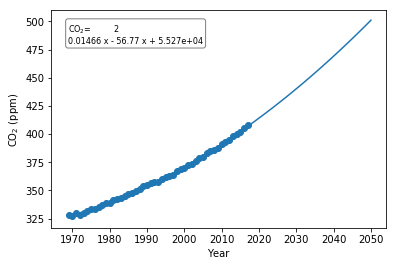

In [37]:
fit_order=2

fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=scripps.CO2.resample('A').mean().index.year
y=scripps.CO2.resample('A').mean()

x_fit=np.linspace(1970,2050)  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

textstr='CO$_2$={}'.format(np.poly1d(a))
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)

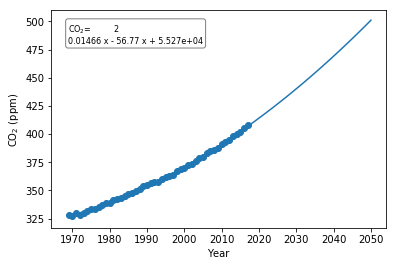

In [38]:
#get the x and y data from the larger data set for plotting and statistics.
x=scripps.CO2.resample('A').mean().index.year
y=scripps.CO2.resample('A').mean()

#i am going to fit the data using poly1d and use linspace to give us a bunch of points.
fit_order=2   #this is the order of the line.
x_fit=np.linspace(1970,2050)  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

#plot the data, the fit, label the axes and add the equation using a text box.
fig,ax=plt.subplots()
ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='CO$_2$={}'.format(np.poly1d(a))
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)